In [1]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

In [2]:
from tqdm import tqdm_notebook, tnrange
from itertools import chain
from skimage.io import imread, imshow, concatenate_images
from skimage.transform import resize
from skimage.morphology import label
from sklearn.model_selection import train_test_split

In [3]:
import cv2
import PIL
import plotly.express as px
import seaborn as sns
import glob
import random
import sys

In [4]:
from os import listdir

In [106]:
absolute_path = os.path.dirname(os.path.realpath('__file__'))
relative_path = "Kaggel_dataset/csv/mass_case_description_test_set.csv"
full_path = os.path.join(absolute_path, relative_path)
# full_path = "../Kaggel_dataset/mass_case_description_train_set.csv"
csv_mass = pd.read_csv(full_path)

In [107]:
full_mammo_images_paths = csv_mass["image file path"]

In [108]:
roi_images_paths = csv_mass["ROI mask file path"]

In [109]:
absolute_path = os.path.dirname(os.path.realpath('__file__'))
relative_path = "Kaggel_dataset/jpeg"

image_dir = os.path.join(absolute_path, relative_path)
image_dir

'/Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg'

In [110]:
def changeFolderPath(x):
    res = [i for i in range(len(x)) if x.startswith("/", i)]
    idx = res[1]
    folderPath = x[0:idx]
    x = x.replace(folderPath, image_dir)
    return x

In [111]:
full_mammo_images_paths = full_mammo_images_paths.apply(changeFolderPath)
full_mammo_images_paths.head()

0    /Users/gryffindorgirl/Desktop/Internship/Kagge...
1    /Users/gryffindorgirl/Desktop/Internship/Kagge...
2    /Users/gryffindorgirl/Desktop/Internship/Kagge...
3    /Users/gryffindorgirl/Desktop/Internship/Kagge...
4    /Users/gryffindorgirl/Desktop/Internship/Kagge...
Name: image file path, dtype: object

In [112]:
roi_images_paths = roi_images_paths.apply(changeFolderPath)
roi_images_paths.head()

0    /Users/gryffindorgirl/Desktop/Internship/Kagge...
1    /Users/gryffindorgirl/Desktop/Internship/Kagge...
2    /Users/gryffindorgirl/Desktop/Internship/Kagge...
3    /Users/gryffindorgirl/Desktop/Internship/Kagge...
4    /Users/gryffindorgirl/Desktop/Internship/Kagge...
Name: ROI mask file path, dtype: object

In [113]:
def changeFilePath(x):
    res = [i for i in range(len(x)) if x.startswith("/", i)]
    idx_start = res[7]+1
    fileName = x[idx_start:]
    x = x.replace(fileName, 'full__pre.jpg')
    return x

In [114]:
def changeFilePath2(x):
    res = [i for i in range(len(x)) if x.startswith("/", i)]
    idx_start = res[7]+1
    fileName = x[idx_start:]
    x = x.replace(fileName, 'roi__pre.jpg')
    return x

In [115]:
full_mammo_images_paths = full_mammo_images_paths.apply(changeFilePath)
full_mammo_images_paths.head()

0    /Users/gryffindorgirl/Desktop/Internship/Kagge...
1    /Users/gryffindorgirl/Desktop/Internship/Kagge...
2    /Users/gryffindorgirl/Desktop/Internship/Kagge...
3    /Users/gryffindorgirl/Desktop/Internship/Kagge...
4    /Users/gryffindorgirl/Desktop/Internship/Kagge...
Name: image file path, dtype: object

In [116]:
roi_images_paths = roi_images_paths.apply(changeFilePath2)
roi_images_paths.head()

0    /Users/gryffindorgirl/Desktop/Internship/Kagge...
1    /Users/gryffindorgirl/Desktop/Internship/Kagge...
2    /Users/gryffindorgirl/Desktop/Internship/Kagge...
3    /Users/gryffindorgirl/Desktop/Internship/Kagge...
4    /Users/gryffindorgirl/Desktop/Internship/Kagge...
Name: ROI mask file path, dtype: object

In [117]:
def read_images_from_paths(file_paths):
    images = []
    for path in file_paths:
        try:
            img = Image.open(path)
            images.append(np.array(img))  # Convert the image to a numpy array and append to the list
        except Exception as e:
            print(f"Error loading image from '{path}': {e}")
    return images

In [118]:
from PIL import Image

In [126]:
array_of_images = read_images_from_paths(full_mammo_images_paths[200:])

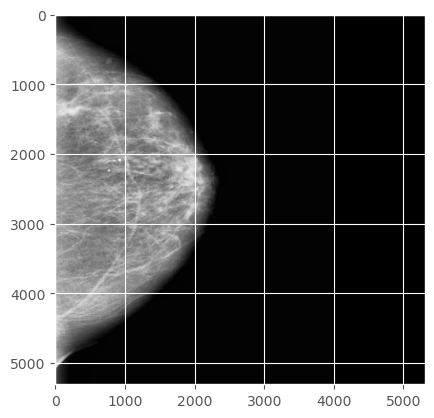

In [127]:
plt.imshow(array_of_images[0], cmap='gray')

In [128]:
len(array_of_images)

178

In [129]:
array_of_roi = read_images_from_paths(roi_images_paths[200:])

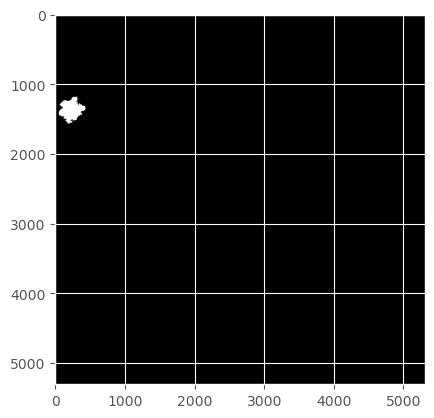

In [130]:
plt.imshow(array_of_roi[0], cmap='gray')

In [131]:
array_of_images[0].shape

(5307, 5307)

In [56]:
!pip install opencv-Python

In [57]:
import cv2

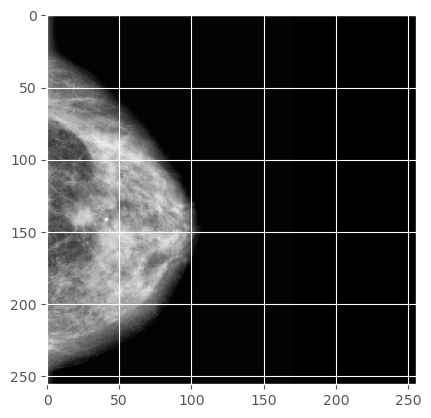

In [62]:
# newsize = (1000, 1000)
# resized = cv2.resize((array_of_images[0]), (256, 256))
# # im1 = (array_of_images[0]).resize(newsize)
# # Shows the image in image viewer
# plt.imshow(resized, cmap='gray')

In [63]:
resized.shape

(256, 256)

In [132]:
for i in range(178):
    resized = cv2.resize((array_of_images[i]), (256, 256))
    path = full_mammo_images_paths[i+200]
    res = [i for i in range(len(path)) if path.startswith("/", i)]
    idx_start = res[7]+1
    fileName = path[idx_start:]
    y = path.replace(fileName, 'full__pre__res.jpg')
    print(y)
    cv2.imwrite(y, resized)

/Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.79040702411772004907422243033911584465/full__pre__res.jpg
/Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.309442487611565870504132812100361660014/full__pre__res.jpg
/Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.1171337510424515733644328272589553771/full__pre__res.jpg
/Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.306729082811125941800587634072424887532/full__pre__res.jpg
/Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.120985041711985744633300778561327463509/full__pre__res.jpg
/Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.231418499611483562804956443353410908413/full__pre__res.jpg
/Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.231418499611483562804956443353410908413/full__p

/Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.57854390411125252714525874340062956276/full__pre__res.jpg
/Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.17013629211628263208575305094053577396/full__pre__res.jpg
/Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.403835121912715843000196868400248684588/full__pre__res.jpg
/Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.282731428412133309500343758122109197320/full__pre__res.jpg
/Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.76260080812556604832726304252499236727/full__pre__res.jpg
/Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.255728555213663489012061953844243079023/full__pre__res.jpg
/Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.61088132613876322320822040393863367878/full__pr

In [133]:
for i in range(178):
    resized = cv2.resize((array_of_roi[i]), (256, 256))
    path = roi_images_paths[i+200]
    res = [i for i in range(len(path)) if path.startswith("/", i)]
    idx_start = res[7]+1
    fileName = path[idx_start:]
    y = path.replace(fileName, 'roi__pre__res.jpg')
    print(y)
    cv2.imwrite(y, resized)

/Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.27482545913023369601220156280992196047/roi__pre__res.jpg
/Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.113512200013908794339480175931279083002/roi__pre__res.jpg
/Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.426384962513649626623228112721155143248/roi__pre__res.jpg
/Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.129334845213724994138804850432575672607/roi__pre__res.jpg
/Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.77212619711975684525779833721441146672/roi__pre__res.jpg
/Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.218188934811485655338580082221028304992/roi__pre__res.jpg
/Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.210650850013774158827926526882991110847/roi__pre__re

/Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.305608761311452355602792766720481770937/roi__pre__res.jpg
/Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.140943753610148655440492550530176201389/roi__pre__res.jpg
/Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.47192517012656234441691122440522246732/roi__pre__res.jpg
/Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.244922986413794324533068688833538680384/roi__pre__res.jpg
/Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.333945537913595541133242272012618859454/roi__pre__res.jpg
/Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.58380567113967993729178689602411895352/roi__pre__res.jpg
/Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.154710156412596240610170136852613181245/roi__pre__re